# Laboratorio 4 - Regresión y Clustering

## Paula Hípola Gómez, José Ignacio Navas Sanz y Belén Ortega Pérez

## Entregable 3 - Bodega de Vino

In [1]:

%reset
#Importamos las librerías necesarias
#Numpy
import numpy as np
#Pandas
import pandas as pd
#Scikit-Learn
import sklearn as sk
#Matplotlib
import matplotlib.pyplot as plt


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Carga y Visualización de Datos

In [2]:
#Importamos el CSV
dataset = pd.read_csv('vinos.csv')
#Guardamos una copia del dataset original
datasetOriginal = dataset
#Mostramos los datos
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Limpieza de Datos

In [3]:
#Datos nulos
nulos = pd.DataFrame(dataset.isna().sum(), columns=["Número de nulos"])
nulos

,Número de nulos
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


No hay datos nulos por lo que podemos continuar sin problemas a la comprobación de "missing values"

In [4]:
#Datos missing
missing = pd.DataFrame(dataset.isnull().sum(), columns=["Número de missing values"])
missing

,Número de missing values
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


No hay 'missing values' por lo que podemos continuar sin problemas al siguiente paso, comprobar repetidos

In [5]:
tamOrig = dataset.shape
print('Tamaño del dataset sin eliminar datos duplicados: ', tamOrig)
dataset = dataset.drop_duplicates()
nuevoTam = dataset.shape
print('Eliminando los duplicados, el dataset queda del tamaño: ', nuevoTam)
if tamOrig == nuevoTam:
    print('No hay datos duplicados')
else:
    print('Se han eliminado,', tamOrig[0] - nuevoTam[0],'datos duplicados')

Tamaño del dataset sin eliminar datos duplicados:  (178, 13)
Eliminando los duplicados, el dataset queda del tamaño:  (178, 13)
No hay datos duplicados


Ya hemos terminado el apartado de la limpieza de los datos, pasamos a preprocesarlos

### Preprocesamiento de Datos

In [6]:
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
from sklearn.preprocessing import MinMaxScaler

x = dataset.values #returns a numpy array
min_max_scaler = MinMaxScaler()

matrizAt = min_max_scaler.fit_transform(x)
matrizAt [0:5]


array([[0.84210526, 0.1916996 , 0.57219251, 0.25773196, 0.61956522,
        0.62758621, 0.57383966, 0.28301887, 0.59305994, 0.37201365,
        0.45528455, 0.97069597, 0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , 0.03092784, 0.32608696,
        0.57586207, 0.51054852, 0.24528302, 0.27444795, 0.26450512,
        0.46341463, 0.78021978, 0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, 0.41237113, 0.33695652,
        0.62758621, 0.61181435, 0.32075472, 0.75709779, 0.37542662,
        0.44715447, 0.6959707 , 0.64693295],
       [0.87894737, 0.23913043, 0.60962567, 0.31958763, 0.4673913 ,
        0.98965517, 0.66455696, 0.20754717, 0.55835962, 0.55631399,
        0.30894309, 0.7985348 , 0.85734665],
       [0.58157895, 0.36561265, 0.80748663, 0.53608247, 0.52173913,
        0.62758621, 0.49578059, 0.49056604, 0.44479495, 0.25938567,
        0.45528455, 0.60805861, 0.32596291]])

In [8]:
from sklearn.metrics.pairwise import euclidean_distances

matrizD = euclidean_distances(matrizAt,matrizAt) 
print(matrizD)


[[0.         0.62683248 0.57331769 ... 1.42788461 1.35195151 1.52021614]
 [0.62683248 0.         0.72090904 ... 1.33922263 1.27502377 1.49688615]
 [0.57331769 0.72090904 0.         ... 1.28971502 1.22263247 1.34533449]
 ...
 [1.42788461 1.33922263 1.28971502 ... 0.         0.39924775 0.60992201]
 [1.35195151 1.27502377 1.22263247 ... 0.39924775 0.         0.6145566 ]
 [1.52021614 1.49688615 1.34533449 ... 0.60992201 0.6145566  0.        ]]


In [9]:
from sklearn.cluster import AgglomerativeClustering

aglo = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')

aglo.fit(matrizAt)
aglo.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
dataset['cluster_'] = aglo.labels_
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Magnesium')

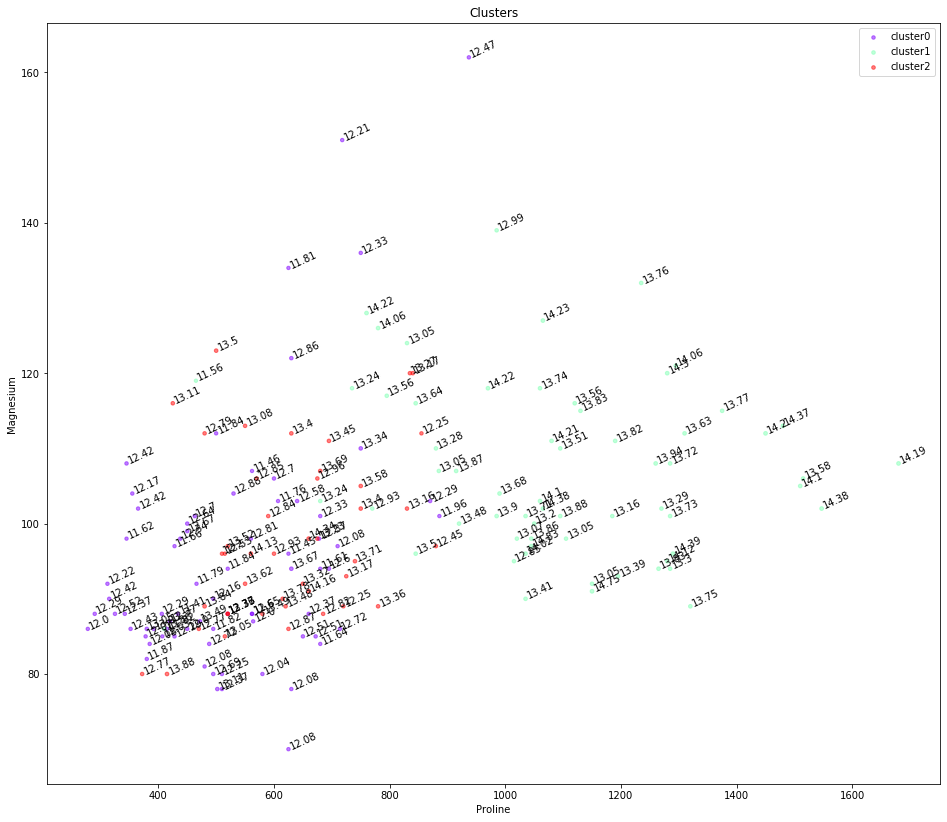

In [14]:
import matplotlib.cm as cm
    
n_clusters = max(aglo.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))


plt.figure(figsize=(16,14))
for color, label in zip(colors, cluster_labels):
    subset = dataset[dataset.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Proline[i], subset.Magnesium[i], subset.Alcohol[i], rotation=25) 
    plt.scatter(subset.Proline, subset.Magnesium, s= subset.Alcohol, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Proline')
plt.ylabel('Magnesium')
